<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-3:-Patient Drug Review-(Model-1)" data-toc-modified-id="Case-3:-Patient Drug Review"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case 2: Pneumonia X-ray image analysis</a></span></li><li><span><a href="#Background" data-toc-modified-id="Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Models-and-training" data-toc-modified-id="Models-and-training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Models and training</a></span></li><li><span><a href="#Results-and-Discussion" data-toc-modified-id="Results-and-Discussion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results and Discussion</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Case 3: Patient Drug Review (Model 1)
Team 16:
1. Bellarina Chew
2. Nik Adam Nik Joharris
3. Valentin Dassin<br>

Last modified: 19.03.2020<br>
Neural Networks for Health Technology Applications
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

## Background
The aim of this notebook is to learn to use neural networks in machine-learning problems involving text data from https://www.kaggle.com/jessicali9530/kuc-hackathon-winter-2018/home <br>

## Data
The dataset used is a dataset of patient drug reviews extracted from https://www.drugs.com/ <br>

In [1]:
# Read the basic libraries (similar start as in Kaggle kernels)
%pylab inline
import time # for timing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras import preprocessing
from sklearn.model_selection import train_test_split # preprocessing datasets
from tensorflow.keras.preprocessing.text import Tokenizer # text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences # text preprocessing
from tensorflow.keras.models import Sequential # modeling neural networks
from tensorflow.keras.layers import Embedding, Dense, Activation, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten, Dropout # layers for neural networks
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score # final metrics

# Input data files are available in the "../input/" directory.
import os
print(os.listdir("C:/Users/Adam/Desktop/Metropolia UAS/Neural Networks/Data/kuc-hackathon-winter-2018"))
tf.__version__

Populating the interactive namespace from numpy and matplotlib
['drugsComTest_raw.csv', 'drugsComTrain_raw.csv']


'2.0.0'

<br>
<b>First the data is initialized</b>

In [2]:
dftrain = pd.read_csv("C:/Users/Adam/Desktop/Metropolia UAS/Neural Networks/Data/kuc-hackathon-winter-2018/drugsComTrain_raw.csv")
dftest = pd.read_csv("C:/Users/Adam/Desktop/Metropolia UAS/Neural Networks/Data/kuc-hackathon-winter-2018/drugsComTest_raw.csv")

#show first 5 data set
dftrain.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


## Preprocess data 

### Splitting the data 
The dataset provided has already separated the training data from the test data. After that, we proceeded to initialize the samples and labels by using the review and rating columns respectively for both training and test data.

### Tokenizing the data
Tokens were initialized to a maximum of 5000 values. The fit_to_texts was used on to update the internal vocabulary dictionary based on a list of texts. This method creates the vocabulary index based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary word_index["the"] = 1; word_index["cat"] = 2. Every word gets a unique integer value. 0 is reserved for padding. Hence the lower integer means more frequent word. The texts_to_sequences is used to transform each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. The sample is then padded using pad_sequences so that all sequences in a list have the same length. <br>

In [3]:
# Extract the review and rating columns

train_samples = dftrain['review'].values.tolist()
train_labels = dftrain['rating'].values
test_samples = dftest['review'].values.tolist()
test_labels = dftest['rating'].values

In [4]:
# Tokenize the text
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_samples)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_samples)
test_sequences = tokenizer.texts_to_sequences(test_samples)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 51429 unique tokens.


In [5]:
train_data = pad_sequences(train_sequences, maxlen=200)
test_data = pad_sequences(test_sequences, maxlen=200)
print(train_data[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    5   38   28   35  197    1   45    5   15  848   12 2922   99
  150 

### Converting labels
The ratings in the dataset ranges from 0 to 10. As per the assingment's requirements, this was reduced to 3 categories:<br>
 - label = 0 (positive), when rating > 6<br>
 - label = 1 (neutral), when rating == 5 or rating ==6<br>
 - label = 2 (negative), when rating < 5<br>
 <br>
This was done for both train and test data

In [6]:
for i in range(len(train_labels)):
    x = train_labels[i]
    if x > 6:
        train_labels[i] = 0
    elif x == 5:
        train_labels[i] = 1
    elif x== 6:
        train_labels[i] = 1
    else:
        train_labels[i] = 2
        
for i in range(len(test_labels)):
    x = test_labels[i]
    if x > 6:
        test_labels[i] = 0
    elif x == 5:
        test_labels[i] = 1
    elif x== 6:
        test_labels[i] = 1
    else:
        test_labels[i] = 2

### Converting labels 
By using the to_categorical function, you are able to convert a class vector (integers) to binary class matrix.

In [7]:
train_labels = to_categorical(np.asarray(train_labels))
print('Shape of train data tensor:', train_data.shape)
print('Shape of train label tensor:', train_labels.shape)

test_labels = to_categorical(np.asarray(test_labels))
print('Shape of test data tensor: ', test_data.shape)
print('Shape of test labels tensor: ', test_labels.shape)

Shape of train data tensor: (161297, 200)
Shape of train label tensor: (161297, 3)
Shape of test data tensor:  (53766, 200)
Shape of test labels tensor:  (53766, 3)


### Splitting training data
The training data is split into as follows: <br><b>
- 75% training 
- 25% test</b>

In [8]:
VALIDATION_SPLIT = 0.25

# split the data into a training set and a validation set
indices = np.arange(train_data.shape[0])
np.random.shuffle(indices)
train_data = train_data[indices]
train_labels = train_labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * train_data.shape[0])

x_train = train_data[:-nb_validation_samples]
y_train = train_labels[:-nb_validation_samples]
x_val = train_data[-nb_validation_samples:]
y_val = train_labels[-nb_validation_samples:]

## Model
### Model 1
The model used is a 1D Convolutional Neural Network (CNN). This model was inspired by the example Sakari gave in Kaggle. This model uses 1D CNN because it is works well for identifying simple patterns within your data which will then be used to form more complex patterns within higher layers. A 1D CNN is very effective when you expect to derive interesting features from shorter (fixed-length) segments of the overall data set and where the location of the feature within the segment is not of high relevance. The 1D CNN shares similar characteristics to its 2D and 3D counterparts, the only real difference being that the key difference is the dimensionality of the input data and how the filter slides across the data.

This model incorporates an Embedding layer to ensure that the resulting embedded vectors are representations of categories where similar categories — relative to the task — are closer to one another.In addition it also decreases the dimensionability of the vectors, making it manageable and saves memory. 

The MaxPooling layer is added to help over-fitting by providing an abstracted form of the representation because it reduces the dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned.

In [9]:
model = Sequential()
model.add(Embedding(5000, 16, input_length = 200))
model.add(Conv1D(32, 3, activation = 'relu', input_shape = (200,)))
model.add(MaxPooling1D(3,3))
model.add(Conv1D(64, 3, activation = 'relu'))
model.add(MaxPooling1D(3,3))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(MaxPooling1D(3,3))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 16)           80000     
_________________________________________________________________
conv1d (Conv1D)              (None, 198, 32)           1568      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 66, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 64, 64)            6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 21, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 19, 128)           24704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 6, 128)            0

### Compiling 
After several iterations, we found that the 'Adam' optimizer produced the best results for this paticular model.

In [10]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['acc'])

### Training model 1
The model was trained with a batch size of 128 and an epoch of 5. This was proven to have the best results in this particular case because ovefitting was observed after the model surpassed 5 epochs. Due to the high number of batch size and low number of epochs, the model also trained faster.

In [11]:
%%time
history = model.fit(x_train, y_train,
                   batch_size = 128,
                   epochs = 5,
                   validation_data = (x_val, y_val),
                   verbose = 0)

print("The accuracy achieved is: ", history.history['acc'])
print("The loss achieved is: ", history.history['loss'])

The accuracy achieved is:  [0.7288238, 0.78757244, 0.8093376, 0.82454765, 0.83879876]
The loss achieved is:  [0.6874930012076617, 0.5661139264820432, 0.5130147283382799, 0.46893956031998807, 0.42634457141656384]
Wall time: 8min 49s


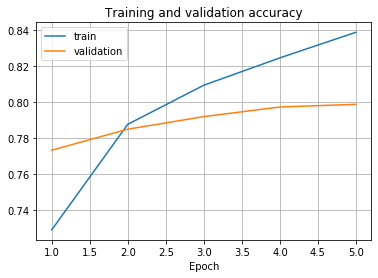

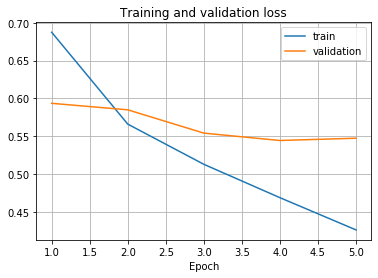

In [12]:
# Plot the accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
e = arange(len(acc)) + 1

plot(e, acc, label = 'train')
plot(e, val_acc, label = 'validation')
title('Training and validation accuracy')
xlabel('Epoch')
grid()
legend()

figure()

plot(e, loss, label = 'train')
plot(e, val_loss, label = 'validation')
title('Training and validation loss')
xlabel('Epoch')
grid()
legend()

show()

## Evaluating model 1
The model's performance was observed and evaluated using different evaluation methods. <br>
- Confusion matrix: Summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. 
- Classification report: A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False.
- Cohen's kappa: Measures interrater reliability (sometimes called interobserver agreement). Interrater reliability, or precision, happens when your data raters (or collectors) give the same score to the same data item

In [13]:
# Find the predicted values for the validation set
y_pred = argmax(model.predict(x_val), axis = 1)
y_true = argmax(y_val, axis = 1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred).T
print('Confusion matrix:')
print(cm)

# Calculate the classification report
cr = classification_report(y_true, y_pred)
print('Classification report:')
print(cr)

Confusion matrix:
[[25329  2399  3141]
 [   35    29    42]
 [ 1384  1116  6849]]
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     26748
           1       0.27      0.01      0.02      3544
           2       0.73      0.68      0.71     10032

    accuracy                           0.80     40324
   macro avg       0.61      0.55      0.53     40324
weighted avg       0.75      0.80      0.76     40324



In [15]:
# Calculate the cohen's kappa, both with linear and quadratic weights
k = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's kappa (linear)    = {k:.3f}")
k2 = cohen_kappa_score(y_true, y_pred, weights = 'quadratic')
print(f"Cohen's kappa (quadratic) = {k2:.3f}")

Cohen's kappa (linear)    = 0.537
Cohen's kappa (quadratic) = 0.633


In [16]:
model.evaluate(test_data, 
               test_labels, 
               verbose = 0)

[0.5489263604409469, 0.79846]

In [17]:
pred_tensor = model.predict(test_data) 
for imnum in range(len(test_data)):
    predicted = np.argmax(pred_tensor[imnum])
    true = np.argmax(test_labels[imnum])
    if (predicted != true):
        break

print("Test sample",imnum,": predicted",predicted,"true",true)

Test sample 5 : predicted 0 true 2


## Results and Discussion
From the results obtained above, several things can be concluded <br>
- The classification report shows that the model's ability to predict positive and negative ratings are decent however its ability to predict neutral ratings are poor. 
- From the cohen kappa's coefficient, the value obtained shows that there is a moderate agreement between the two interrators
- The model performed well when it was given unseen data. The accuracy and loss for the trained data were 0.84 and 0.43 respectively. The values obtained for test data were 0.80 and 0.55 for both accuracy and loss respectively.
- Compared to model 2, using CNN proved to be much faster - 8 min 59s wall time - whereas using LSTM took 37 mins. However, overall accuracy and loss was better in the LSTM model - 0.82 and 0.49 for both accuracy and loss respectively. 

## Conclusion 
This model used 1D CNN to train and evaluate text data. It has its strength and weaknesses. This model was much trained much faster than the LSTM model. The accuracy and loss were decent and it predicted positive reviews decently. However, in terms of performance, the LSTM had better accuracy and loss values. The model's ability to predict neutral and negative values were sub par, especially neutral values that had values of 0.27 and 0.01 for both precision and recall respectively. 